In [27]:
%matplotlib inline
import matplotlib
from ipywidgets import interactive, FloatSlider, HBox, interactive_output, Label as lbl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
from scipy.stats import t, norm
matplotlib.rcParams['figure.dpi'] = 144
import scipy.stats as stats
from bokeh.layouts import column
from bokeh.models import *
from bokeh.plotting import Figure, output_file, show
from bokeh.io import output_notebook, reset_output
from random import random, choice
from matplotlib import gridspec as gridspec
reset_output()
output_notebook()




Loading BokehJS ...

In [6]:
from scipy.stats import t as t

In [7]:
import seaborn as sns
sns.set()


# Plot Functions

In [8]:
from ipywidgets import IntSlider, FloatSlider, interact, Output
from matplotlib import gridspec


def normpdf_plot():
    # Define the range of x values
    x = np.linspace(-4, 4, 100)

    # norm.pdf gives the density of the normal distribution
    # here the loc argument is the mean, and the scale argument is the standard deviation
    y = norm.pdf(x)
    plt.figure(figsize = (3, 2))
    plt.plot(x,y)
    plt.suptitle("Density of the Standard Normal Distribution", fontsize = 8)
    plt.xlim(-4,4)
    plt.ylim(0, 0.42)
    plt.tick_params(axis='both', which='major', labelsize=6)
    plt.show()

def normcdf_plot():
    #Define the range of x values
    x = np.linspace(-4, 4, 100)

    # norm.pdf gives the density of the normal distribution
    # here the loc argument is the mean, and the scale argument is the standard deviation
    y = norm.pdf(x, loc=0, scale=1)

    plt.figure(figsize = (3, 2))
    plt.fill_between(x, y, where=abs(x) < 1.96, alpha = 0.5)
    plt.ylim(0, 0.42)
    plt.annotate("Area of shaded \nregion: 0.95", (1, .3), fontsize = 8)
    plt.plot(x,y)
    plt.suptitle("P(-1.96 < X < 1.96)", fontsize = 8)
    plt.xlim(-4,4)
    plt.tick_params(axis='both', which='major', labelsize=6)
    plt.show()

def z_test_plot(alpha):
    # Initialize plot and set title
    plt.figure(2, figsize=(16,6))
    plt.ylim(0, 0.41)
    plt.xlim(-4,4)
    plt.suptitle("Rejection Regions for Normal(mu, 1)" +
                 " with Null Hypothesis: mu=0",
                 fontsize=20)
    
    # Initialize x and y values
    x = np.linspace(-4, 4, 100)
    y = norm.pdf(x)
    
    # Draw normal curve
    plt.plot(x, y)
    
    # Compute 1-alpha/2 percentile
    r = norm.ppf(1-(alpha/2))
        
    # Results for rejecting null hypothesis
    if r < 1.75:
        # Draw dotted line for observed X value, color it green when rejecting null
        plt.plot([1.75]*2, [0, 0.41], linestyle = 'dotted', color = 'green', alpha = 0.7, linewidth = 3)
        plt.annotate("Reject Null Hypothesis", (1.84, 0.17), fontsize=13)
        plt.annotate("with {}% Confidence".format(int(100*(1- round(alpha, 2)))), (1.84, 0.15), fontsize=13)
        plt.annotate("(alpha = {})".format(round(alpha, 2)), (1.84, 0.13), fontsize=13)

    # Results for failing to reject null hypothesis
    else:
        # Draw dotted line for observed X value, color it green when failing to reject null
        plt.plot([1.75]*2, [0, 0.41], linestyle = 'dotted', color = 'red', alpha = 0.7)
        plt.annotate("Do Not Reject Null Hypothesis", (1.84, 0.17), fontsize=13)
        #plt.annotate("with {}% Confidence".format(int(100*(1- round(alpha, 2)))), (1.84, 0.15), fontsize=13)
        plt.annotate("(alpha = {})".format(round(alpha, 2)), (1.84, 0.15), fontsize=13)

    # Label the X = 1.75 line
    plt.annotate("X=1.75", (1.86, 0.2), fontsize=20)

    # Fill the rejection regions
    plt.fill_between(x, y, where=x < -r, interpolate=True, color='blue', alpha=0.5)
    plt.fill_between(x, y, where=x > r, interpolate=True, color='blue', alpha=0.5)
    
    # Disable y-axis tick marks and grid
    frame1 = plt.gca()
    frame1.axes.get_yaxis().set_visible(False)

    plt.show()
    


 # Create interactive plot with alpha value determined by a slider
alpha_plot1 = FloatSlider(min=0.01, max=0.2, step=0.01, continuous_update=False)
alpha_l = lbl(value=r"\(\alpha\)")
ui_error = HBox([alpha_l, alpha_plot1])
z_plot_interactive = interactive_output(z_test_plot, {'alpha': alpha_plot1})



def t_normal_plot(df, alpha):
    x = np.linspace(-6, 6, 200)
    y_norm = norm.pdf(x)
    y_t = t.pdf(x, df)
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[10, 1]) 
    
    fig = plt.figure(2,  figsize=(10,4))
    plt.xlim(-6, 6)
    plt.ylim(0, 0.41)
    plt.suptitle("{}% Rejection Regions for Normal(0,1) and \n".format(int(100*(1-alpha))) +  
                 "t-distributions with {} degrees of freedom".format(df),
                 fontsize = 12)
    
    ax = plt.subplot(gs[0])
    plt.ylim(-.01, 0.41)
    plt.xlim(-6, 6)

    tdist = plt.plot(x, y_t, color='blue', alpha = 0.5)
    Normal = plt.plot(x, y_norm, linestyle='dotted', color='red')
    
    r_norm = norm.ppf(1-(alpha/2))
    r_t = t.ppf(1-(alpha/2), df)
    y_r_t = t.pdf(r_t, df)

    plt.plot([-r_norm, -r_norm], [-0.05, norm.pdf(r_norm)], color='red', alpha = 0.8, linestyle  = 'dotted', linewidth = 1)
    plt.plot([r_norm, r_norm], [-0.05, norm.pdf(r_norm)], color='red', alpha = 0.8, linestyle  = 'dotted', linewidth = 1)

    plt.plot([-r_t, -r_t], [-0.2, y_r_t], color='blue', alpha = 0.8, linestyle  = 'dotted', linewidth = 1)
    plt.plot([r_t, r_t], [-0.2, y_r_t], color='blue', alpha = 0.8, linestyle  = 'dotted', linewidth = 1)

    plt.legend(["Normal(0,1)", "t-distribution"], fontsize = 6)
    plt.tick_params(axis='both', which='major', labelsize=4)
    frame1 = plt.gca()
    frame1.axes.get_yaxis().set_visible(False)
    plt.tick_params(axis='both', which='major', labelsize=8)

    ax2 = plt.subplot(gs[1])
    plt.ylim(-.1, 0)
    plt.xlim(-6, 6)

    plt.fill_between((-6, -r_norm), (-.05, -.05), -.025, color = "red", alpha = 0.4)
    plt.fill_between((r_norm, 6), (-.05, -.05), -.025, color = 'red', alpha = 0.4)

    plt.fill_between((-6, -r_t), (-.1, -.1), -.075, color = "blue", alpha = 0.4)
    plt.fill_between((r_t, 6), (-.1, -.1), -.075, color = 'blue', alpha = 0.4)

    plt.tick_params(axis='both', which='major', labelsize=4)


    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

    
    plt.show()

    
df = IntSlider(min=3, max=40, step=1, continuous_update=False)
alpha = FloatSlider(min=0.01, max=0.2, step=0.01, continuous_update=False)
df_l =  lbl(value="Degrees of Freedom")
alpha_l = lbl(value="alpha")
ui = HBox([df_l, df, alpha_l, alpha])

t_normal_out = interactive_output(t_normal_plot, {'df': df, 'alpha': alpha})

def t_plot_1():
    x = np.linspace(-4, 4, 100)
    y_norm = norm.pdf(x)
    y_t = t.pdf(x, 5)
    plt.figure(figsize = (3, 2))
    plt.plot(x,y_norm, color='red', linestyle='dashed')
    plt.suptitle("Densities of Normal(0,1) and \n t-distribution with 5 degrees of freedom", fontsize = 7)
    plt.plot(x,y_t, color='blue')
    frame1 = plt.gca()
    frame1.axes.get_yaxis().set_visible(False)
    plt.tick_params(axis='both', which='major', labelsize=6)

    plt.legend(["Normal(0,1)", "t-distribution"], fontsize = 6)
    plt.show()

p_out = Output(layout={'border': '2px solid gray', 'font-size': '20'})
with p_out:
    print("p-value: ")
def p_plot(X):
    # Initialize plot and set title
    plt.figure(2, figsize=(16,6))
    plt.ylim(0, 0.41)
    plt.xlim(-4,4)
    plt.suptitle("P-values", fontsize=20)
    
    # Initialize x and y values
    x = np.linspace(-4, 4, 200)
    y = norm.pdf(x)
    
    # Draw normal curve
    plt.plot(x, y)
    

    # Draw dotted line for observed X value, color it green when rejecting null
    plt.plot([X]*2, [0, 0.41], linestyle = 'dotted', color = 'green', alpha = 0.7, linewidth = 3)


    # Fill from X to infinity rejection regions
    plt.fill_between(x, y, where=x <= -abs(X), interpolate=True, color='blue', alpha=0.2)
    plt.fill_between(x, y, where=x >= abs(X), interpolate=True, color='blue', alpha=0.2)
    
    # Disable y-axis tick marks and grid
    frame1 = plt.gca()
    frame1.axes.get_yaxis().set_visible(False)
    p_out.clear_output(wait=True)
    with p_out:
        print("X = {}".format(X))
        print("p-value: {}".format(1-norm.cdf(abs(X)) + norm.cdf(-abs(X))))
    plt.show()
    


 # Create interactive plot with alpha value determined by a slider
X_p_plot = FloatSlider(value=1.75, min=-4, max=4, step=0.01, continuous_update=False)
X_l = lbl(value=r"Observed X value")
ui_p = HBox([X_p_plot, X_l])
p_plot_interactive = interactive_output(p_plot, {'X': X_p_plot})

def confint_plot(): 
    X = np.random.normal(0,1,200).reshape(-1, 10)
    np.random.seed(23)

    fig = plt.figure()
    for c, num in zip([confint_norm(x, 0.1) for x in X], range(1,21)):
        ax = fig.add_subplot(21,1,num)
        plt.xlim(-1.5, 1.5)
        plt.axis('off')
        if c[0] > 0 or c[1] < 0:
            ax.plot(c, (0,0), 'r-')
            ax.plot(0, 0, 'ro')
        else:
            ax.plot(c, (0,0))
            ax.plot(0,0,'bo')
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
    ax2 = fig.add_subplot(21, 1, 21)
    plt.xlim(-1.5, 1.5)
    plt.ylim(0,0.01)
    plt.setp(ax2.get_yticklabels(), visible=False)
    fig.suptitle('Visualizing confidence levels on a 95% confidence interval', fontsize=10)
    sns.despine(offset=-5, trim=True, left = True)



out = Output(layout={'border': '2px solid gray', 'font-size': '20'})
with out:
    print("Power of Test: ")

def power_plot(mu, alpha):
    x = np.linspace(-6, 6, 200)
    y_null = norm.pdf(x)
    
    y_alternate = norm.pdf(x, mu, 1)

    
    fig = plt.figure(2,  figsize=(12,4))
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[20, 1]) 

    plt.xlim(-6, 6)
    plt.ylim(0, 0.41)
    
    ax1 = plt.subplot(gs[0])
    null = plt.plot(x, y_null, linestyle='dotted', color='red')
    alternate = plt.plot(x, y_alternate, color='blue')
    plt.legend(["Null Distribution", "True Distribution"], fontsize = 12)

    plt.suptitle("Power of a Hypothesis Test: \n" +
                 "Probability of a True Positive", fontsize = 12)
    
    r_norm = norm.ppf(1-(alpha/2))


    plt.plot([-r_norm, -r_norm], [-0.05, norm.pdf(r_norm)], color='red',
             alpha = 0.3, linestyle  = 'dotted', linewidth = 1)
    plt.plot([r_norm, r_norm], [-0.05, norm.pdf(r_norm)], color='red',
             alpha = 0.3, linestyle  = 'dotted', linewidth = 1)
    

    plt.fill_between(x, y_alternate, where=x<=-r_norm, color='blue', alpha=0.2)
    plt.fill_between(x, y_alternate, where=x>=r_norm, color='blue', alpha=0.2)
    
    
    plt.tick_params(axis='both', which='major', labelsize=4)

    frame1 = plt.gca()
    frame1.axes.get_yaxis().set_visible(False)
    plt.xlim(-6, 6)

    
    ax2 = plt.subplot(gs[1])
    ax2.axis("off")
    plt.fill_between((-6, -r_norm), (-.05, -.05), -.025, color = "red", alpha = 0.4)
    plt.fill_between((r_norm, 6), (-.05, -.05), -.025, color = 'red', alpha = 0.4)

    plt.xlim(-6, 6)

    out.clear_output(wait=True)
    
    power = (1-norm.cdf(r_norm, mu, 1)) +norm.cdf(-r_norm, mu, 1)
    with out:
        #null_lbl = lbl(value=r'Null Hypothesis: \(\mu = 0\)'.format(alpha))
        
        #mu_lbl = lbl(value=r'True value of \(\mu\): {}'.format(round(mu, 2)))
        #alpha_lbl = lbl(value=r'Error Level: \(\alpha\) = {}'.format(alpha))
        beta_lbl = lbl(value=r'Test Power: \(\beta\) = {}'.format(round(power, 2)))
        #display(HBox((null_lbl, mu_lbl, alpha_lbl, beta_lbl)))
        display(beta_lbl)
    plt.show()

    
alpha = FloatSlider(min=0.01, max=0.2, step=0.01, continuous_update=False)
mu = FloatSlider(min=-3, max=3, step=0.01, value = 1, continuous_update=False)

mu_l =  lbl(value=r'True Population \(\mu\)')
alpha_l = lbl(value=r"\(\alpha\)")
ui_power = HBox([mu_l, mu, alpha_l, alpha])

power_out = interactive_output(power_plot, {'alpha': alpha, 'mu': mu})



### Before starting, run all cells in the bottom of the notebook under the "plots" section

# Hypothesis Testing: Motivation

A media group offers a curated music selection service for restaurants and retail stores. Their sales team claims their curated playlists have a subconscious pyschological effect on customers which leads immediately to increased sales. It sounds hard to believe, they agree, but the results speak for themselves. 

Suppose a coffee shop is considering subscribing to a curated playlist service in their stores in hopes to increase sales revenue. They record the daily sales and 7 days of letting the employees choose music and then for 7 days of playing a free trial of the service.



In [9]:
curated = np.array([ 971.04,  919.71,  853.42, 1020.38, 1000.92, 1062.83,  685.71])
non_curated = np.array([765.67, 897.53, 759.67, 999.32, 788.79, 838.69, 890.78])

coffee_sales = pd.DataFrame({"Curated":curated, 
                             "Non-curated":non_curated})
coffee_sales.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
coffee_sales['Differences'] = curated-non_curated
coffee_sales

,Curated,Non-curated,Differences
Sunday,971.04,765.67,205.37
Monday,919.71,897.53,22.18
Tuesday,853.42,759.67,93.75
Wednesday,1020.38,999.32,21.06
Thursday,1000.92,788.79,212.13
Friday,1062.83,838.69,224.14
Saturday,685.71,890.78,-205.07


From these measurements, can we conclude that the two treatments had different effects on sales? Computing their respective averages gives the following:

In [10]:
curated_mean = curated.mean().round(2)
non_curated_mean = non_curated.mean().round(2)
difference_mean = (curated_mean-non_curated_mean).round(2)

print("\nAvg daily sales, curated playlist: ${}".format(curated_mean))
print("Avg daily sales, no curated playlist: ${}".format(non_curated_mean))
print("\nAvg difference in daily sales: ${}".format(difference_mean))


Avg daily sales, curated playlist: $930.57
Avg daily sales, no curated playlist: $848.64

Avg difference in daily sales: $81.93


An observed difference in average sales of $\$81.93$ might seem like substantial evidence in favor of the curated playlist. But keep in mind that the recorded sales for each day is a random quantity, and so the average difference is a random quantity as well.

As a result, while the size of the difference does matter, we need to determine if it is the result of random chance or if it results from an underlying true difference between the two groups. 

To accomplish this, we will form a **hypothesis test** that uses known probability distributions to determine how likely we would have observed these results by chance, and report a statistical conclusion informed by this probability.

## Distributions and Density Functions

When we talk about random observations such as the ones we've described above, we're dealing mathematically with **random variables**, objects which take on values according to **probability distributions**. Instead of focusing on abstract definitions, let's consider some examples:

### Discrete Random Variables
Discrete variables take on values from a finite set of outcomes. For instance, if we flip a coin, we get one of two results. Similarly, if we roll a standard six-sided die, there are six possible results. In general, for either of these examples, we would consider each outcome to occur with equal probability. 

These are both examples of random variables with a *discrete uniform distribution*.

### Continuous Random Variables
Some random quantities can take on an infinite number of values. As an example, consider drawing a random number uniformly from the interval between zero and one. This number is a **continuous random variable**. Moreover it has a **uniform distribution** defined on the interval $[0,1]$. 

Continuous probability distributions are determined by a unique function called a **probability density function** (pdf). 

For instance, the normal distribution's density function has two parameters: $\mu$, the mean,  and $\sigma$, the standard deviation. Its definition is given below:

$$ f(x; \mu, \sigma) = \frac 1 {\sqrt{(2\pi\sigma^2)}} \exp\Big({\frac{-(x-\mu)^2}{2\sigma^2}}\Big)$$

At a glance, this might not seem very informative, so let's graph this function, letting $\mu=0$ and $\sigma^2 = 1$. 

Note: a normal distribution with  $\mu=0$ and $\sigma^2 = 1$ is called the **standard normal** distribution.


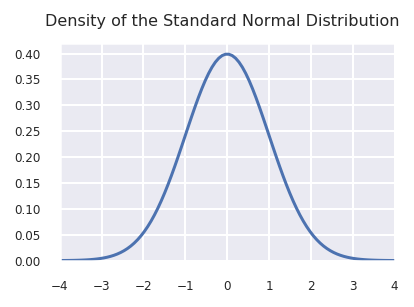

In [11]:
normpdf_plot()

A common misconception is that a density function $f(x)$ gives us the probability of drawing the number $x$ from this distribution. In fact, if $X$ is a random variable taken from any continuous probability distribution, then for any number $x$, the probability of the random variable $X$ is equal to $x$, which we write as $P(X = x)$, is zero! 

We are able, however, to compute the probability that X lies in a particular region. For any random variable $X$ probability density function $f(x)$, the probability that $X$ is in the interval $[a,b]$ is given by taking the integral of $f(x)$ on the interval $[a,b]$, denoted by

$$ \int _a ^b f(x) dx$$

This is more clear from its visual representation: the area under the graph of $f(x)$ between $a$ and $b$. 

In [12]:
t.cdf(2.45,6)-t.cdf(-2.45,6)

0.9502092477397626

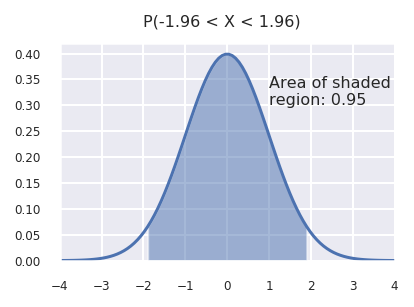

In [13]:
normcdf_plot()

Instead of computing these integrals directly, we generally make use of a function known as the **cumulative density function**. This function tells us, for an input $x$,  the probability of drawing a random number less than or equal to $x$. We write the cumulative density function as

$$F(x) = \int_{-\infty}^x f(x) dx$$

We can use this function to get the integral of $f(x)$ on the interval $(a,b)$ as follows:

$$ \int _a ^b f(x) dx \: =  \int_{-\infty}^b f(x) dx \: \: - \:  \int_{-\infty}^a f(x) dx \: = \:  F(b)-F(a)$$

As a side note, this means it is also easy to obtain the probability that a random draw would be greater than x:

$$ P(X > x) = 1 - F(x)$$

We use the cdf to compute and visualize the probability that a random draw from a standard normal distribution would land in the interval $(-1.96, 1.96)$.

In [14]:
norm.cdf(1.96)-norm.cdf(-1.96)

0.950004209703559

## A Simple Hypothesis Test

Now we have the tools to set up a simple hypothesis test.

Assume that $X = 1.75$ is a value drawn from a normal distribution with an unknown mean $\mu$ and a standard deviation of $\sigma = 1$. We want to prove that $\mu \not= 0$. 

Specifically, let's say we want to be $90\%$ sure that the true parameter $\mu$ is not equal to zero. In other words, we would like there to be only a $10\%$ probability that we make a mistake in concluding that $\mu\not=0$. Here we say that $90\%$ is the confidence level of the test, and $\alpha = 0.1 = 10\%$ is the error level.

### Z-test 
With these motivations in mind, we set up a **z-test** \*  with two competing hypotheses:

- **Null Hypothesis:**      $\mu=0$
- **Alternate Hypothesis:** $\mu\not=0$

A hypothesis test always proceeds as follows:
1. Assume the null hypothesis is true.
2. Compute rejection regions (as described below) for the test for the desired confidence level.
3. If the observed test statistic lies within the rejection regions, reject the null hypothesis.
    - For this simplified example, the test statistic is X.
    - For the coffee shop example, the test statistic will be the difference in average daily sales.

\* *We call this test a z-test because it is based on a standard normal distribution, and standard normal variables are often denoted by Z.*


### Rejection Regions

Now that we have a framework for testing, how do we determine the rejection regions for this test? Again, bear in mind that we want to prove that $\mu\not=0$. It stands to reason, then, that we would only want to reject the null hypothesis for values of X that are far from zero. 

Our alternate hypothesis, which claims $X \not= 0$, denotes that we are performing a 2-sided test. In general, the null hypothesis will be rejected based the absolute value of X, i.e. its distance from zero. Test rejection regions have boundary points given by **critical values**. For a 2-sided z-test, the critical value $x^*$ will be the value that satisfies

$$P(|x|\:  < \:|x^*|\: ) = 1 - \alpha$$

In other words, there will be a probability of $1-\alpha$ that a random draw from the null distribution will be in the interval $(-|x^*|, |x^*|)$, and a probability of $\alpha$ that it will be outside that interval. The rejection region of the test consists of all points outside that interval. Formally, the rejection region $R$ is defined by

$$ R = \{ x : |x| > |x^*| \} $$

Shown below is a plot summarizing the rejection regions and test results for a Normal(0,1) distribution based on a given value of $\alpha$. We can see how the results of our test change as we vary the value of $\alpha$.

In [15]:
display(z_plot_interactive, ui_error)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 2304x864 with 1 Axes>', 'image/png': 'iVBORw0KGgoAAAANSUhEUgAABy0AAAMmCAYAAABIDh1HAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzsnXdUVMfbx79LlaYCCqggRREVG1ixG3vvEtTEXmKJYAsW7L3FLooFNYpGxRZbLNFI7IogWAERAQEVkSJSln3/4OX+drZxF3ZZlOdzDucwd++defbuzL0z8zSBSCQSgSAIgiAIgiAIgiAIgiAIgiAIgiAIQkNoaVoAgiAIgiAIgiAIgiAIgiAIgiAIgiDKNqS0JAiCIAiCIAiCIAiCIAiCIAiCIAhCo5DSkiAIgiAIgiAIgiAIgiAIgiAIgiAIjUJKS4IgCIIgCIIgCIIgCIIgCIIgCIIgNAopLQmCIAiCIAiCIAiCIAiCIAiCIAiC0CiktCQIgiAIgiAIgiAIgiAIgiAIgiAIQqOQ0pIgCIIgCIIgCIIgCIIgCIIgCIIgCI1CSkuCIAiCIAiCIAiCIAiCIAiCIAiCIDQKKS0JgiAIgiAIgiAIgiAIgiAIgiAIgtAopLQkCIIgCIIgCIIgCIIgCIIgCIIgCEKjkNKSIAiCIAiCIAiCIAiCIAiCIAiCIAiNQkpLgiAIgiAIgiAIgiAIgiAIgiAIgiA0CiktCYIgCIIgCIIgCIIgCIIgCIIgCILQKKS0JAii1JObmwsnJyfub968eZoWqVTy+++/M/cpISFB0yIR3wlZWVlM31qwYIGmRSqT5OXl4dKlS5g2bRo6deoEFxcX5nfx8vLStIgEoRH+/fdfZiycO3dOqetTUlLQvHlzODk5oW7duoiIiFCTpERpQSQSYeDAgVyfOXv2rKZFKhECAgKYsfL48WO1teXl5cW1U79+fbW1Q/yPyMhI5vfdtWuX3HNpbkcUh1atWnF9Z8yYMZoWp1RB94YoDTx9+hTnzp3Dnj17sH//fly6dAkxMTGaFosgCII3OpoWgCAI1RMbG4uOHTsWep6hoSGMjY1RrVo1ODs7o02bNmjTpg20tbVLQEqC0AwzZ84sdHNSR0cHxsbGqFixIpycnNCwYUP06tULlpaWJSQlQbAkJydjypQpePjwoaZF0SgBAQFYtGgRc0xbWxvnz5+HnZ0d73oiIyPRo0cPrty7d2+sW7dORVIS3xobN25ESkoKAKBfv36oWbOmhiUixImLi0NoaCiePHmCJ0+eICwsDF++fOE+d3d3x5IlS5SqUyAQYPr06Rg9ejQAYO3atejYsSMMDQ1VKjtR+vj3338xbtw4qeP+/v5wc3PjXU9WVhYaNGjAlV1dXREQEKASGb8HJO+Pnp4enjx5UqS6hgwZgpCQEK589OhRNGrUqNgyEgRBfE+IRCIEBATg4MGDiIqKknmOi4sLJkyYgA4dOpSwdARBEMpBnpYEUYb58uULkpKSEBwcjD/++AMTJkxAp06d8M8//2hatDLJrVu3GIvn06dPa1qkMktubi5SUlIQHR2NS5cuYc2aNejQoQPmzJmDtLQ0TYtHlEGmT59e5hWW8hAKhdiyZYumxSC+UV69eoU///wTAKCrq4spU6ZoWCICyPcQmDBhAlq2bIkffvgBnp6e2LNnD+7du8coLItDq1at0LRpUwBAYmIi9uzZo5J6vxeK68H8rbFp0yZNi0AQJca6deuY8f3+/XtNi0QQRDFISUnB2LFjsXjxYrkKSwAIDg7GxIkTsWTJEgiFwhKUkCAIQjlIaUkQBEN8fDwmTpyoMJwQQZRFhEIhAgMDMWDAAHz48EHT4hBliLt37+L27dtc2cbGBqtWrcLZs2dx9epV7s/Hx0eDUmqW8+fP4+XLl5oWg/gG2bx5M7dp07NnT1StWlXDEhEA8Pr1a1y/fh0fP35Uaztjx47l/vf39+c8bomyR3BwMG7cuKFpMQiCIAhCKXJycjB16lQEBQUxx+3s7NC5c2e0a9cOlStXZj47dOgQVq5cWZJiEgRBKAWFhyWIMoClpSUOHz4sdfzLly+Ii4tDUFAQAgMDGcv1DRs2wMnJCe3atStJUQmixJkzZw46derEHBMKhUhJSUFYWBhOnDiB8PBw7rOYmBj8+uuvMscUQaiDy5cvc/8LBALs3LkTNWrU0KBEpY+8vDxs3rwZW7du1bQoxDfEs2fPmPFVECqUKL3o6+vDwsICb9++VUl97dq1Q82aNREREYH09HTs3bsX06dPV0ndxLfHpk2b0LZtWwgEAk2LQhAEQRC8WLt2Le7du8eVK1asiNWrV6N9+/bcsZycHPz5559YsWIFcnNzAQAHDx5EgwYN0KdPn5IWmSAIolBIaUkQZQAdHR1YW1vL/KxWrVro0KEDRowYgdGjR3ObQCKRCOvXry8VC3cdHR28ePFCozJ8C3h5ecHLy0vTYnxzmJqayhwftra2aNiwIYYOHYpNmzZhx44d3GcPHz7E1atXeeWO/R7Q19enMahBwsLCuP/t7e1JYSmHy5cvIywsDPXq1dO0KMQ3wp49eyASiQDk5/hxcnLSsESEONra2qhRowbq16+PBg0aoH79+qhVqxZu374tMydhURAIBBg8eDDnbXDkyBH88ssvMDAwUEn9pQ0PDw94eHhoWoxSS3h4OP7++2907dpV06IQBPGN8t9//2laBKIMERsbyxhT6+npYf/+/ahduzZznq6uLoYNG4YKFSpgxowZ3PGNGzeiW7du0NPTKzGZCYIg+EDhYQmCAABUr14dGzZsYI69ePGCwu0RZR6BQABPT0+0bt2aOX727FkNSUSUNZKTk7n/LSwsNChJ6aNDhw5MeePGjRqShPjWSEpKwsWLF7nyoEGDNCgNIUm7du3w8OFDnD17FitWrMCPP/4IZ2dn6Orqqrytvn37cpt1nz9/xsmTJ1XeBlF66dChA2OguWXLFuTl5WlQIoIgCILgh6+vL3JycrjyuHHjpBSW4vTq1YtZP8XFxSEwMFCtMhIEQRQFUloSBMFRYMUuzv379zUkDUGULoYOHcqUaWwQJYV46G4dHQqSIU7Hjh3RsGFDrnzz5k08ePBAgxIR3wqnTp3iNnl0dXXJs6qUYWxsXGLejqampmjZsiVXPnbsWIm0S5QOnJyc0K1bN6786tUr/PXXXxqUiCAIgiAKJzc3F5cuXeLKurq6GD58eKHXjRo1iimTMTZBEKUR2vkiCIKhfv36ePLkCVd+9+5dketKTExESEgIPnz4gNTUVJiYmMDS0hKNGzeGqampKsRVilevXuHly5f4+PEjMjMzYWZmhmrVqqFx48bQ19cvdv1CoRBhYWF48+YNkpOTkZmZCWNjY1SrVg21a9dG1apVVfAt1MuzZ8/w8uVLJCcnIycnB+bm5rCxsYGLi4vKvRtCQ0Px+vVrJCYmoly5crCyskKzZs1QsWJFlbajKiQV+h8+fEBOTk6R7ktubi4eP36M2NhYfPz4ESKRCJUqVUKNGjVQr169Yodkfvv2LR4/foykpCRoa2vDysoKzs7OsLGxKVa9xSE1NRUPHjxAUlISPn/+DCMjI5ibm8PFxQVWVlYqbevTp0949OgREhISkJGRAVNTU9StWxd169Yt8r1NTExEeHg44uPjkZ6eDoFAAAMDA1SuXBk2NjaoVauW2sLqFISvVAWRkZF49uwZPn78iKysLJiamqJq1apo3LgxypUrp7J2AOD58+eIiopCUlISsrKyYGNjgx49eqi0DQCYNm0ak4tw06ZNOHjwoMrbkSQ7OxvBwcHcONbT04OZmRlq1aql0MK5KGRlZeHhw4dISEjAhw8foKenhxYtWijVz

HBox(children=(Label(value='\\(\\alpha\\)'), FloatSlider(value=0.01, continuous_update=False, max=0.2, min=0.01, step=0.01)))

# The power of a test

Our hypothesis test has two possible hypothesis and two possible conclusions. This means there are four possibilities to consider when running the test. These possible cases are displayed below in a *contingency table*:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:214px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-s268{text-align:left, font-size:200px}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-s268"></th>
      <th class="tg-s268"><b>Null Hypothesis is False</b></th>
      <th class="tg-0lax"><b>Null Hypothesis is True</b></th>
  </tr>
  <tr>
      <td class="tg-s268"><b>Reject Null</b></td>
    <td class="tg-s268">True Positive (TP)</td>
    <td class="tg-0lax">False Positive (FP)</td>
  </tr>
  <tr>
      <td class="tg-s268"><b>Fail to Reject Null</b></td>
    <td class="tg-s268">False Negative (FN) </td>
    <td class="tg-0lax">True Negative (TN) </td>
  </tr>
</table>
### Structure of a contingency table
- Columns represent the underlying truth
- Rows give the possible test results. 
- The values in the each cell are the probabilities of obtaining the result denoted by the row, given the truth condition stated by the column.

Using this terminology, we see that we define hypothesis tests by setting a rate on false positives. In other words, a test with $\alpha = 0.05$ means that there is a probability of $0.05$ of obtaining a false positive.

### Why do we start by limiting the probability of a false positive?
1. When/why are false positives less desirable than false negatives?
2. What happens if we start by trying to maximize the rate of true positives?


## Power

In statistical literature we call the true positive rate the **power** of the test, and denote it by $\beta$.

The value of $\beta$ is determined both by the value of $\alpha$ as well as the true value of the unknown parameter in the test. 

In our z-test, consider the following. If the true value of $\mu$ is $10$, we are more likely to reject the null hypothesis than if $\mu = 2$, because random draws when $\mu=10$ will tend to be farther away from zero. For a possible true value of $\mu$, we can compute the power of the test as the probability that a random draw from Normal($\mu, 1$) will fall within the rejection region $R$, which is given by

$$\int_R f(x;\mu, 1) dx$$






We visualize this below. The red bars at the bottom of the plot show the rejection regions determined by setting a value for $\alpha$, and the area of the shaded region gives the probability that X is within the rejection region based on the true value of $\mu$.

- What happens to $\beta$ as we vary $\mu$? What about when we vary $\alpha$?

In [16]:
display(power_out,ui_power,  out)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 1728x576 with 2 Axes>', 'image/png': 'iVBORw0KGgoAAAANSUhEUgAABcMAAAIwCAYAAABKsXN2AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzs3Xd4FOXax/HvJtn0kFByAgYQOEJEEUEhtFhoUgQEBNRDPyoWQFFEKYqiIKJ4QEFEuoCF3nsRkJYCCU2aoCBFakIS0rP7/pF3hywphpCwEH6f68p1JTPzzNwzsxPCvffej8lqtVoRERERERERERERESnCnBwdgIiIiIiIiIiIiIhIYVMyXERERERERERERESKPCXDRURERERERERERKTIUzJcRERERERERERERIo8JcNFREREREREREREpMhTMlxEREREREREREREijwlw0VERERERERERESkyFMyXERERERERERERESKPCXDRURERERERERERKTIUzJcRERERERERERERIo8JcNFREREREREREREpMhTMlxEREREREREREREijwlw0VERERERERERESkyFMyXERERETuWBcuXGDIkCE88cQTPPjggwQFBdG1a1dHhyW56Nq1K0FBQSxcuNDRoeQqNDSUoKAgGjVq5OhQRERERKSAuDg6ABEREZE71cCBA1m0aFGW5V5eXpQrV4769evTvXt3Spcu7YDoir60tDS6d+/OsWPHAPD19cVsNuPr6+vQuBYuXMigQYMAOHz4cIFte7uLjY3l+++/B6Bv374OjubO0LVrV8LCwvI11hGvly1btrBnzx4efvhhHn/88Vt+fBEREZGbpWS4iIiIyE3KnIC1Wq1cvnyZQ4cOcejQIebPn8+3335LrVq1HBxl0bN161aOHTuGn58fc+bMoUKFCo4O6a4WGxvL+PHjgaKRDPfw8KBixYoEBAQU2jF8fX0pVapUluUJCQkkJCTg5OREiRIlCu34N+rXX39l5syZdOvWTclwERERuSMpGS4iIiJyk2rWrMmsWbOMnxMTE1mzZg0jRowgNjaWfv36sX79etzd3R0YZdFz9OhRAOrUqaNEuBS46tWrs3r16kI9hu3Ng+uNGzeO8ePHU6ZMGTZu3FioMYiIiIjcTdQzXERERKSAeXh40LZtW4YMGQJk9LVev369g6MqepKTkwHw9PR0cCQiIiIiInInUGW4iIiISCFp2bIlgwYNwmKxcODAAVq1amW3/uLFi0yZMoVNmzZx9uxZXFxcqFixIi1btqRLly64urrabT948GAWLFjAiy++yLvvvmu3bvXq1bz55psAvPPOO7z88st263/66Sc++ugjgoOD7arYbSIiIvjhhx/YtWsXly9fxsvLi6pVq9KhQweefvppTCaT3fahoaF069aNwMBANm7cyObNm5k1axYHDhwgOjqagQMH0qNHjzxfq507dzJ79mwiIyO5cuUKvr6+1KhRgy5dulCvXj27ba/v1b5o0SK7nzds2EDZsmX/8Zjnz59n/fr1bNq0iT///JNz587h7OxM+fLladSoET169KBYsWJ5PoeC1K1bN0JDQ/nvf//Le++9l+N27733HosXL6ZVq1Z8+eWXQNZ7s3HjRqZPn86hQ4dIS0ujSpUqdOnShdatW+e4X4vFwoIFC1iyZAlHjhwhMTERf39/GjRowEsvvcS9995rt/31va+DgoLs1vfp0yfb1ilJSUlMnjyZ5cuXc/bsWby8vKhbty5vvvlmrtX+ly9fZvr06WzatIlTp05htVopW7YsjRs3pmfPnvj5+WUZk5KSwk8//cSqVav4/fffSUxMNNqUPProo7Rp04aaNWsa219/Ha+/PosXL2bRokUcOXKE+Ph4fHx8KFmyJNWrV6dFixa3vI3Ivn37mDlzJuHh4Vy8eBEPDw/uv/9+2rZtS7t27XByyloHde7cOSZPnsy2bds4c+YMVquVEiVKcM8991C/fn06duxIQEAABw8epG3btsa4mTNnMnPmTLt9hYeHO+x5EREREckrJcNFREREComrqyvFixfn0qVLxMfH263bu3cvL7/8MjExMUDGpJupqans27ePffv2sWTJEqZNm0bJkiWNMcHBwSxYsIDw8PAsx4qIiDC+Dw8Pz5IMt62vXbt2lrFffPEFU6ZMMX728vIiNjaWHTt2sGPHDjZu3Mjo0aOzTaYBTJs2jVGjRmEymfDx8clxu5yMGTOGiRMnAhj7uHTpEuvXr2f9+vX06tWL/v37G9t7e3tTqlQpo6+ym5sbPj4+xnpnZ+c8HXf48OGsWbPG+LlYsWLEx8dz8OBBDh48yLJly5g1a5ZDJkDt2LEjoaGhLF26lP79++PikvXP9vj4eCP+Z599Ntv9fP/993z66afGdU1KSiIqKsr4+uCDD7KMSUxMpE+fPmzduhXI6Inv7u7O6dOnmTt3LkuWLOF///sfTZo0Mcb4+vpSvHhxoqOjAbL0wc6uej8+Pp4XXniB3377DVdXV5ycnLh8+TIrV65k+/btzJs3j/Lly2cZFxERQe/evY1nx2w24+zszNGjRzl69Kjx7FSqVMkYk5aWxosvvmgk7G3XIyYmhkuXLnH48GFiYmLskuG5GTBgAMuXLzd+9vHxIT4+nujoaH7//XeOHTt2S5Ph3377LV999RVWqxXIuN7x8fGEhYURFhbG2rVrGT9+PGaz2Rhz7Ngx/vOf/xjX0cXFBU9PT86ePcvZs2fZtWsXFStW5Omnn8bFxYVSpUpx9epVEhMT8fDwwMvLyy6GzM/9iBEjmDlzJj4+Pna/m0REREQcTW1SRERERApJUlISly9fBrBL1l65coXXX3+dmJgYqlSpwrx589i9ezeRkZF89dVX+Pr6cujQId555x27/dkm4fztt9+4evWq3Tpbks/Ly4tdu3aRnp6e7frrk+Hff/89U6ZMoUSJEnz44YeEh4eze/duoqKiGDt2LP7+/qxYsYLJkydne44XL15k9OjR/Oc//2Hr1q2Eh4cTGRlJ8+bN83SNVqxYYSTCu3Tpwvbt2wkPD2fHjh107doVgEmTJrFkyRJjzPvvv8+2bdv473//C2RU4G/bts34KlOmTJ6Ofe+999KvXz9WrFjB3r17CQ8PZ+/evcyaNYuHHnqIkydPMnTo0Dztq6A1a9YMPz8/Ll68yObNm7PdZtWqVSQmJhIYGJileh4yqqe/+OIL2rZta9ybnTt3Gtdt9uzZLFu2LMu4kSNHsnXrVlxdXRk2bBi7d+8mIiKC1atXExwcTHJyMu+88w5//PGHMWb8+PHMnz/f+Dnz/di2bRsvvvhiluOMGzeOK1euMGXKFKKiooiMjOSHH36gdOnSxMTEGJXumZ0+fZrXXnuNmJgYOnbsyKpVq9i7dy9RUVEsX76cxx57jLNnz9K3b1+7Z2D58uWEhYXh4eHB559/zp49ewgPD2ffvn388ssvDB06lPvvvz+XO3JNeHg4y5cvx8nJiUGDBrFr1y4iIiLYt28fv/76K5999hmPPvponvZVEBYtWsTYsWPx9vZm0KBB7Ny5k8jISPbs2cPEiRMJDAxk06ZNjB071m7cmDFjiImJISgoiLlz57J//37Cw8PZs2cPixcv5qWXXqJ48eIAVK5cmW3bttGxY0cg482a6++xt7f3LTtnERERkfxSZbiIiIhIIZk/f75Rqfnwww8by2fPns2FCxcoVqwY06ZNw9/fH8ioaG7evDne3t68+OKLbN++nR07dhiJzrJly3LPPfdw5swZdu/ezWOPPQZATEwMR44c4d///jcVK1Zk/fr1HDx4kGrVqgFw4sQJzp8/j9lstqt8jY2NZezYsbi4uPDdd99Rv

HBox(children=(Label(value='True Population \\(\\mu\\)'), FloatSlider(value=1.0, continuous_update=False, max=3.0, min=-3.0, step=0.01), Label(value='\\(\\alpha\\)'), FloatSlider(value=0.01, continuous_update=False, max=0.2, min=0.01, step=0.01)))

Output(layout=Layout(border='2px solid gray'), outputs=({'output_type': 'display_data', 'data': {'text/plain': "Label(value='Test Power: \\\\(\\\\beta\\\\) = 0.06')", 'text/html': '<p>Failed to display Jupyter Widget of type <code>Label</code>.</p>\n<p>\n  If you\'re reading this message in the Jupyter Notebook or JupyterLab Notebook, it may mean\n  that the widgets JavaScript is still loading. If this message persists, it\n  likely means that the widgets JavaScript library is either not installed or\n  not enabled. See the <a href="https://ipywidgets.readthedocs.io/en/stable/user_install.html">Jupyter\n  Widgets Documentation</a> for setup instructions.\n</p>\n<p>\n  If you\'re reading this message in another frontend (for example, a static\n  rendering on GitHub or <a href="https://nbviewer.jupyter.org/">NBViewer</a>),\n  it may mean that your frontend doesn\'t currently support widgets.\n</p>\n', 'application/vnd.jupyter.widget-view+json': {'version_major': 2, 'version_minor': 0, 'model_id': '26423a33b86c49b89560560033c13b37'}}, 'metadata': {}},))

### Precision and Recall

For those more familiar with data science, and especially for those familiar with information retrieval, the definition of test power may call to mind the concept of **recall** in terms of precision/recall. 

<img src="recall.jpg" width='300px'>

- Precision: Proportion of True Positives to (True Positives + False Positives)
- Precision: Proportion of True Positives to (True Positives + False Negatives)

In a hypothesis testing framework, the formulas for power and recall are the same, but there are slightly different assumptions or situations in which the precision/recall language is more appropriate.

With precision and recall, we're generally talking about a classifier, e.g. a yes or no answer to the question "is this example relevant." We are classifying data points from a sample into two groups based on that classifier. Crucially, while recall and power both give us the probability of obtaining a positive result, the consequences of said result are different when performing classification/document retrieval compared to testing.

With recall, a positive result means that we are including the data point in a class of data points. With hypothesis testing, a positive result means we are claiming that there is substantive evidence for the presence of an effect. 

# p-values

You might have noticed above that the Null Hypothesis is rejected for a certain range of $\alpha$ values. By moving the slider around, we see that the Null Hypothesis is rejected for approximately $\alpha \geq 0.09$, or equivalently, for up to 91% confidence.

If we had observed X = 1.68, on the other hand. We would have satisfied the rejection region for $\alpha = 0.1$ but not for $\alpha = 0.09$. With this in mind, it is reasonable to say that an observed value of $X=1.75$ gives *more evidence* for rejecting the null hypothesis compared to a value of $X=1.68$.

A **p-value** is a useful method for describing this idea numerically. Working from our graphical understanding of hypothesis testing, we can interpret the **p-value** of a test as the smallest value of $\alpha$ such that the null hypothesis is rejected. Mathematically, the p-value associated with the observed test statistic X is given by

$$ \text{p-value} = P(|x| > |X|), $$

where the probability is computed according to the null distribution.

Note: we can use p-values to determine the result of a hypothesis test. For a test with a given $\alpha$, if the computed p-value is less than $\alpha$, then we reject the null hypothesis.

In [17]:
display(p_plot_interactive, ui_p, p_out)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 2304x864 with 1 Axes>', 'image/png': 'iVBORw0KGgoAAAANSUhEUgAABy0AAAMmCAYAAABIDh1HAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzs3XmY3WVhL/DvTGYm+75CQkjISgIEwqKAguwIAQOCIFQFrRZtrbXSetVea229tdzrbfWKaMUSFxRRlkDYEdAiCMGwZt/JQvZ9m/3+ETgyJMAEQn4zk8/nefI8877nd37ne4TD48l33vcta2xsbAwAAAAAAABAQcqLDgAAAAAAAADs35SWAAAAAAAAQKGUlgAAAAAAAEChlJYAAAAAAABAoZSWAAAAAAAAQKGUlgAAAAAAAEChlJYAAAAAAABAoZSWAAAAAAAAQKGUlgAAAAAAAEChlJYAAAAAAABAoZSWAAAAAAAAQKGUlgAAAAAAAEChlJYAAAAAAABAoZSWAAAAAAAAQKGUlgAAAPupq6++OqNGjcqoUaMyZsyYouMAAACwH6soOgAAAMCbWbp0aU477bQ3va5Tp07p1q1bDjrooIwbNy6nn356jjrqqH2QEAAAAHg7rLQEAADajG3btmXFihWZOnVqrr/++lx66aW56KKLMmvWrKKjAQAAAG9AaQkAALRpzz//fC6++OI89NBDRUcBAAAAXoftYQEAgFanf//++fnPf77L/JYtW7Jo0aLcd999uffee9PQ0JAkqampyRe+8IX86le/yvDhw/d1XAAAAOBNKC0BAIBWp6KiIoMGDdrtY6NHj87ZZ5+diy++OH/5l3+Zbdu2Jdm5dey///u/59prr92XUQEAAIBmsD0sAADQJp1wwgn5yle+0mTuwQcfzKpVqwpKBAAAALwepSUAANBmXXDBBenfv3+TuT/84Q8FpQEAAABej+1hAQCANqtdu3Y59thjM2XKlNLcwoULC0z01lVXV2fu3LlZsGBB1q1bl+3bt6dz587p0aNHxowZk2HDhqWsrKzomO+Iurq6PPvss1myZEnWrVuXhoaG9O7dO8OGDcvhhx/+lt93TU1NZs+enblz52bDhg3ZsWNH2rdvn65du2bgwIEZNmxYBgwYsJffDQAAALujtAQAANq015ZO69evf1v3W7RoUc4666zS+Oyzz863v/3tPbrH5s2bc+KJJ6a6ujpJcuSRR+aXv/zlLtetWbMmd999d37zm9/k6aefLl2/O3369Mlll12Wj370o+natese5WmOk046KStXrkySHH/88Zk0aVKznrd48eKceeaZpfHnPve5fOYzn2nWc5cuXZprr702DzzwQDZv3rzba3r16pXLLrssn/jEJ9KpU6dm3Xft2rW59tprM2XKlGzcuPENrz3ggANy8skn58orr8yQIUOadX8AAAD2nO1hAQCA/crbXY04ZMiQHHXUUaXxQw899KbF12vdfffdTQrIiRMn7va6iRMn5hvf+Eb+8Ic/vGFhmewsOL/zne9k4sSJmT179h7laYmuv/76nH322bn11ltft7BMknXr1uW73/1uJkyYkPnz57/pfadNm5b3v//9ufHGG5v1z+2ll17KTTfdlEcffXSP8gMAALBnrLQEAADatFdWB76iR48eb/ueF1xwQZ5++ukkO7cYvfvuu/PhD3+42c+/7bbbSj9XVVXlnHPO2e11jY2NTcYHHHBADjnkkHTt2jUVFRXZsGFD5syZk1WrVpWuWbp0aa644opMnjw5/fr125O31WJ8/etfz4033thkrqqqKmPGjEn//v1TXl6eZcuWZfr06amvr0+SLFu2LJdddll+8Ytf5JBDDtntfVevXp2/+Iu/yKZNm5rMDxkyJEOHDk2XLl1SW1ubzZs3Z8GCBXnppZfemTcIAADALpSWAABAm1VfX5+pU6c2mdsbW3yec845+cY3vlFa/Xj77bc3u7RcvHhxqfBMktNOOy3du3ff7bVlZWU56aSTcu655+akk05Kr169dnvdtGnTcs0115Tuu27duvzjP/5jrrvuuj15Wy3Cz3/+8yaFZefOnfO5z30uF1988S7bv65cuTLf+ta3Mnny5CTJhg0bcvXVV+emm25KVVXVLvf+4Q9/2KSwPPnkk/OlL30pQ4cO3W2W1atX55FHHsktt9zSZs8LBQAAaClsDwsAALRZd9xxR1asWNFk7t3vfvfbvm/Xrl1z+umnl8bPPPNMFi5c2Kzn3n777U3GF1xwwete+8tf/jI//OEPM3HixNctLJNk/Pjx+dnPfpZTTz21NPfwww83O1NLsWTJknzzm98sjfv06ZNbbrklH/vYx3Z7XmX//v1zzTXX5FOf+lRpbvr06bv8b/yKRx55pPTziBEj8r3vfe91C8sk6du3by6++OLcdNNNueiii97COwIAAKC5lJYAAECb9MQTT+TrX/96k7lTTjkl/fv33yv3f23Z+HpF2as1NjaWVgUmO0ux97znPa97/cCBA5udp6KiIv/8z/+cysrK0mvdc889zX5+SzBp0qQmZ3d+61vfesNS8RWf//znM2bMmNL4xz/+8W6vW758eennU045JRUVzd98qH379s2+FgAAgD2ntAQAAFqdurq6LF26dJc/c+bMyX333ZcvfOELufLKK7Nt27bSczp06JC/+Zu/2WsZTjzxxCYF6OTJk9PQ0PCGz5k6dWqWLVtWGp933nlp167dXsvUp0+fjBs3rjR+7rnn9tq932nV1dW59dZbS+N3v/vdzV4VW15enssvv7w0njdvXpYuXfqGz1m3bt1bCwoAAMA7wpmWAABAq7Ny5cqcdtppzb6+srIy11xzTUaPHr3XMpSXl+f888/PD3/4wyTJSy+9lCeeeCLHH3/86z7ntttuazK+8MIL39Jr19TUZMuWLdm+fXsaGxubPNa1a9fSzwsWLHhL9y/Cs88+26RkPvPMM/fo+ccee2yT8bRp0zJo0KAmc0OHDs2cOXOSJHfffXc+/OEP57DDDnuLiQEAANiblJYAAECbNnr06HzjG9/YbTn1ZqvxXtGtW7d069Ztl/kLLrigVFomO7eIfb3Scvv27bnvvvtK47Fjx2bEiBHNev0VK1ZkypQp+f3vf585c+ZkzZo1zXrexo0bm3VdSzBt2rQm4549ezb7n0+S1NbWNhkvWbJkl2vOPffcUmm5bdu2XHrppTnvvPMyYcKEHHvssamqqnoLyQEAANgblJYAAECb0bFjx3Tp0iUHHXRQxo0bl9NOO22XFXiv1tzVmn/1V3+Vz372s7vMDxs2LEcccURpG9b7778/X/3qV9O5c+ddrn3ggQeydevW0rg5qyx37NiRb3/72/npT3+6SynXHK9+vZZuxYoVTcaf//zn39b9dlfYfuxjH8t9992XGTNmJNlZdN5666259dZb0759+4wbNy7jx4/Pcccdl/Hjx6djx45vKwMAAADNp7QEAABanYEDB+ahhx4qOkaSZOLEiaXSctu2bbn//vtzwQUX7HLd7bffXvq5srIy55577hvet7q6OldddVUef/zxt5ztzc7YbEn29qrQV281+4qOHTvmJz/5Sb72ta/lrrvuarK1bnV1dZ588sk8+eST+f73v5+OHTvmtNNOy8c//vGMHTt2r2YDAABgV+VFBwAAAGjNJkyY0GRb0deeW5nsPIPz1eXjKaeckp49e77hfa+77romz6moqMhZZ52Vf/mXf8ktt9ySRx99NE8//XRmzpyZ2bNnl/6cd955e+Fd7Xt1dXV79X6vPevzFV27ds23vvWtTJ48OVdccUWGDh262+u2b9+eKVOm5MILL8zXv/71vZ4PAACApqy0BAAA9luzZ

HBox(children=(FloatSlider(value=1.75, continuous_update=False, max=4.0, min=-4.0, step=0.01), Label(value='Observed X value')))

Output(layout=Layout(border='2px solid gray'), outputs=({'output_type': 'stream', 'text': 'X = 1.75\np-value: 0.0801183137276342\n', 'name': 'stdout'},))

## The Central Limit Theorem

Why are we talking about normal distributions in the first place? In terms of our motivating example, we don't know anything about the underlying distribution of daily sales differences. As it turns out, we can still make some assertions about the distribution of our average difference in sales.

The **Central Limit Theorem** (CLT) of statistics tells us that if $X$ is a random sample of length with true population mean $\mu$ and population standard deviation $\sigma$, and $\overline X$ is the mean of the sample $X$, then as n gets larger, the distribution of the quantity

$$ \frac{\overline x - \mu}{\sigma / \sqrt n} $$

will converge to a Normal distribution with mean 0 and variance $1$. In other words, for increasingly large sample sizes, if we know the population variance, it becomes increasingly reasonable to approximate the distribution of the sample mean as a normal random variable!

### Visualizing the CLT
From the above definition, the CLT can be hard to interpret intuitively. Here are some are some more effective (and visually appealing!) visualizations of the CLT to help get a better understanding.

http://mfviz.com/central-limit/

Central limit theorem for a binomial distribution
http://blog.vctr.me/posts/central-limit-theorem.html

# The t-distribution

The central limit theorem relies on the true population standard deviation. In a practical setting, we do not know this value, but we do have access to the sample standard deviation $s$, defined by

$$s = \frac{\sum (x_i - \overline x \:)^2}{n-1}$$

It turns out that we can still use the sample standard deviation to get an approximation of the distribution of $\overline x$ by substituting $s$ for $\sigma$ in the formula shown in the CLT, but this quantity is no longer converging to a normal distribution.

### Definition: 
Suppose that X is a random sample from a normal ($0, \sigma$) distribution. Then the distribution of

$$ \frac{\overline x - \mu}{s \: / \sqrt n} $$

is said to converge to a **t-distribution** with $n-1$ **degrees of freedom**. As it turns out, the t-distribution looks very similar to the normal distribution, but the t-distribution will have greater variance. Visually, there will be more density in the outer regions, or tails, of the t-distribution compared to the normal. 

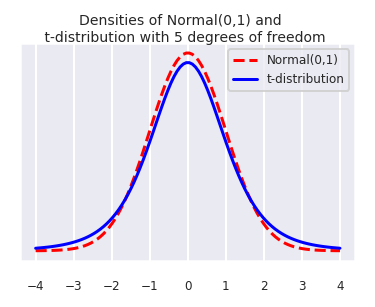

In [18]:
t_plot_1()

These "heavy tails" are not surprising when we consider the additional uncertainty in the t-distribution. Since we use an estimated value $s$ in constructing a t- random variable, it makes sense that we have less certainty in our results than if we used the true population standard deviation.

### Convergence of the t-distribution

As the sample size increases, we see values of $\overline x$ that will tend to be closer to the population mean, and we will also observe values of $s$ that will tend to be closer to the population standard deviation $\sigma$. 

As a result, as sample size increases, the t-distribution will become increasingly close to the standard normal distribution. As a result, the test rejection regions for the t-distribution will also converge to those for the normal distribution.

Shown below is a interactive plot which demonstrates the convergence of the t-distribution to the normal distribution, as well as the resulting confidence intervals. The red bars at the bottom of the plot show rejection regions for a 2-sided z-test, and the blue bars show the regions for the associated 2-sided t-test.

Note: as a result of this convergence, it is not uncommon to use a z-test instead of a t-test for large sample sizes. 

In [19]:
display(ui, t_normal_out)

HBox(children=(Label(value='Degrees of Freedom'), IntSlider(value=3, continuous_update=False, max=40, min=3), Label(value='alpha'), FloatSlider(value=0.01, continuous_update=False, max=0.2, min=0.01, step=0.01)))

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 1440x576 with 2 Axes>', 'image/png': 'iVBORw0KGgoAAAANSUhEUgAABIoAAAIPCAYAAAAcvDWkAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzs3XdUFNfbB/DvAksHAUETjQVNdkVApNkwGruxx8TEhmJUxAj22DV27AVQEEWwx9gjduwKSBUUTRCsoCKK1KUs7Lx/8M78dtld3EUQjc/nHM+Rnbkzd+7MDswz9z6XxzAMA0IIIYQQQgghhBDy2dOo7QoQQgghhBBCCCGEkI8DBYoIIYQQQgghhBBCCAAKFBFCCCGEEEIIIYSQ/0eBIkIIIYQQQgghhBACgAJFhBBCCCGEEEIIIeT/UaCIEEIIIYQQQgghhACgQBEhhBBCCCGEEEII+X8UKCKEEEIIIYQQQgghAChQRAghhBBCCCGEEEL+HwWKCCGEEEIIIYQQQggAChQRQgghhBBCCCGEkP9HgSJCCCGEEEIIIYQQAoACRYQQQgghhBBCCCHk/1GgiBBCiEoOHToEoVAINze32q6KSsLDwyEUCtGjR4/arsp/3rp16yAUCrFo0aLarkqNysjIwNy5c9GpUye0bNkSQqEQY8eOre1qkWoybdo0CIVCBAYGKl0nMzMT9vb2+P777yGRSD5g7apu06ZNEAqFOHToUG1XpUb8/PPPEAqFOHXqVG1XhRBC/jO0arsChBDyPhiGwcmTJ3HkyBH8888/EIlEsLCwQMeOHTF+/Hg0atSo0vLx8fEICQlBbGwssrOzUadOHdjb22PUqFFo06aN0nLR0dHYvHkz7ty5Ay0tLTg7O2PmzJn4+uuvldZz+PDh+Oeff3D69Gl8+eWXVTreOXPm4NixY3Kf6+vro0GDBnB2doarqyuaN29epe1/Kg4fPowXL16gR48eaNGiRW1Xp1qUlpbC2tpa7nNNTU0YGRnhm2++Qffu3TF06FDo6urWQg0/byUlJXB1dcWTJ08AAHXq1AGfz4eJiUkt16xcamoq+vTpw/28c+dOuLi4KFw3OTkZ/fv3BwDcuHEDFhYWH6SO/wVbtmyBSCSCh4cHNDQUv2/NyMjAtm3bcPXqVbx69QpGRkZo3bo13NzcKv29Upm8vDzcunULd+7cwd27d3H37l1kZ2cDAC5evIivvvpKadnRo0dj165d8PPzw4ABA6Cjo1OlOhBCCPl8UKCIEPLJEovFmDJlCi5evAgA0NLSgoGBAdLT03Hw4EGcPHkSW7duRfv27RWWDwwMxIYNG8AwDHg8HoyNjfH27VtcuHABYWFhmD59Otzd3eXKRUdHY8yYMRCLxdDW1kZRUREuX76MmJgYHD58GE2bNpUrc/jwYcTFxWHmzJlVDhJJ4/P5qFOnDoDyINTbt2+RkpKClJQUHD58GGvXrsX333//3vuRZmRkBEtLy2qp//s6cuQI4uLi0LhxY6WBIj09PVhaWqJhw4YfuHbvz8jIiHuYKy4uRnZ2NqKjoxEdHY1Dhw5hz549MDMzq+Va/k/dunVhaWn5nw44XL58GU+ePIG5uTn+/PPPdwaha9vGjRuVBopI1Tx9+hSHDx9G48aN0a9fP4Xr3LlzB2PHjkVOTg4AwNDQEG/fvsXFixdx6dIlzJkzp0q9Mq9du4bp06dXqd6mpqYYOnQodu7ciX379uHXX3+t0nYIIYR8PmjoGSHkk7Vu3TpcvHgRWlpamDt3LmJiYhAVFYWrV6+id+/eEIlE8PLywqtXr+TKXrx4EevXrwfDMBg8eDBu3LiBqKgoREVFYerUqQCA9evX4+rVq3Jl169fD7FYDA8PD8THxyMmJgb9+/dHXl4e/Pz85NbPzs7G+vXr8fXXX1fbsC17e3vcvHkTN2/eRHh4OBITE7F9+3Y0bNgQYrEY8+bNQ1ZWVrXsi9W7d2+cPXsW3t7e1brdmmJvb4+zZ88iKCiotquitoULF3LnNyYmBrdu3YKnpycAICUlBStWrKjlGsoaM2YMzp49Cy8vr9quSo158OABAKB9+/YffZAIKA9YhIWF1XY1/lN2794NsViMH3/8EZqamnLLCwoK8NtvvyEnJwe2trY4c+YMYmNjERUVBVdXVzAMg1WrViEqKqpK+7ewsECXLl3g5eWl9jDPn3/+mTuGT2XIHCGEkNpDgSJCyCfpzZs32LdvHwDAzc0Nbm5u0NPTAwB88cUX2LBhA5o3b468vDz4+/vLlff19QUA2NnZwdvbG+bm5gDK3/5OnDgRQ4YMAQCsWbNGppxIJEJCQgIsLCwwefJkaGlpQU9PD3/88Qc0NDQQGRkpt69169bh7du3WLRoEfh8fvU1ghQ+n49OnTph3bp1XD3PnTtXI/siH56JiQm8vLwwePBgAMC5c+dQWFhYy7X6vBQXFwMoH+b5sevUqRMAYPPmzWAYppZr899QUlKCkydPAgD69u2rcJ19+/bh1atXMDY2RkBAAJo1awagvIfgggUL8O2334JhGGzYsEHt/ffu3Rs3btxAQEAAPD090a5dO7XKW1paomXLlnjx4gVu3Lih9v4JIYR8XihQRAj5JEVGRkIsFgOAwl46mpqacHV1BQCcOnWKWxcAXr16hfv37wMoz92gCLvNlJQU3L17l/s8NzcXEokEDRo0kHmjbGRkBFNTU7x9+1ZmO7dv38bhw4fRv39/tG3bVv0DVZO9vT33IJuamqp0PYlEguPHj8PNzQ1t27aFjY0Nvv32W0ybNg2JiYkKy6iSzPqff/7B3Llz0bVrV9ja2sLJyQnDhg3DwYMHUVpaWmndr169Ci8vL3z77bewsbGBi4sLfv75Z/j7+yMjI0OmDnFxcQCAWbNmQSgUcv+kE1erksw6IiICkyZNgouLC7dPT09P3Lp1S+H6paWl3L5evnyJtLQ0zJs3j6tzt27dsHr1auTn51d6rFXVsWNHAOXDLtlcOYq8fv0aa9asQb9+/WBvb4/WrVujf//+2Lx5M3Jzc5WWE4vFCAoKQr9+/dCqVSu0b98eEydOREJCAoqLi7ljz8zMlCn3rmTWZWVlOHjwIIYPHw5nZ2fY2tqie/fuWLRoEZ49e6awzLVr1yAUCtG7d28AwK1btzBu3Di0bdsWdnZ2GDRoEA4cOKD0WDIzM+Ht7Y0+ffqgdevWsLW1RefOnTF06FD4+vrixYsXSstKq5jg+ODBgzLXXMW2SExMxPTp07lrol27dhg/fnylvXtcXFwgFApx+/ZtPH/+HIsWLULXrl1hY2PD9QRRx8SJE6Grq4vk5OQqJ/jNyMjAihUr0KtXL7Rq1QqOjo4YMmQIQkJCUFJSorCMdFsVFRXBz88P/fv3h729PYRCIRdsk04+nJOTA29vb3Tt2hWtWrVCjx49sGXLFpl9XLt2jbtX2dvbw9XVFfHx8QrrUFpaivDwcCxduhQ//PAD2rdvz93fJk+ejOjo6Cq1R1hYGLKzs2Ftba20RxkbSBo4cCD38kEam/g8Pj4eaWlpau1fUQ8mdbHDkY8ePap22fdpV+nzLRKJsGnTJvTq1Qu2trbo0KEDZsyYofQ+wLp06RJcXV3h4OAAR0dHDB06lJJXE0JIDaIcRYSQT1J6ejqA8gCNsrwo7NvcnJwc3Lt3D3Z2dgAg84DIrlNRkyZNoKWlxf1xbGNjAwAwNjaGhoYGnj9/jrKyMu6P9/z8fLx9+1Ymb0xZWRmWLFkCQ0NDzJ49+z2PWH1lZWUKP8/Ly8OkSZO4YAiPx4OBgQFevXqF06dP4+zZs1i4cCGGDx+u1v5CQkKwevVqbliDvr4+RCIR4uLiEBcXhzNnziAgIEAuEXNJS

# Coffee Shop t-test

Finally, we're ready to return to our coffee shop daily sales example. Our test statistic is based the average difference in daily sales, which we will denote $\overline x$. We will be performing a t-test with 6 degrees of freedom and $\alpha = 0.05$.

Let's start by defining our hypotheses:
- Null Hypothesis: $\mu = 0$
- Alternate Hypothesis: $\mu \not= 0$

We can use the function t.ppf(quantile, df) to get the critical values for the test. Since we're performing a 2-sided test, we want to get the quantile for 2.5% and 97.5%, which will be opposites. 

In [20]:
critical_value_positive = t.ppf(0.975, 6)
critical_value_positive

2.4469118487916806

Finally, if the absolute value of our test statistic is greater than this critical value, we reject the null hypothesis!

In [21]:
print("\nAvg daily sales, curated playlist: ${}".format(curated_mean))
print("Avg daily sales, no curated playlist: ${}".format(non_curated_mean))
print("\nAvg difference in daily sales: ${}".format(difference_mean))


Avg daily sales, curated playlist: $930.57
Avg daily sales, no curated playlist: $848.64

Avg difference in daily sales: $81.93


In [24]:
s_differences = (curated-non_curated).std(ddof=1)
t_star = difference_mean/(s_differences/(7**.5))

print("Value of test statistic: {}".format(t_star))
print("Critical value of test: {}".format(critical_value_positive) + "\n")

if t_star > critical_value_positive:
    print("Reject the null hypothesis.")
else:
    print("Do not reject the null hypothesis.")

Value of test statistic: 1.408063519931395
Critical value of test: 2.4469118487916806

Do not reject the null hypothesis.


We can also compute the p-value associated with this test:

In [25]:
p_val = 2*t.cdf(-abs(t_star), 6)
print("p-value: {}".format(p_val))

p-value: 0.2087577658923105


### The Easy way

It turns out that we don't have to reinvent the wheel any time we want to perform a t-test. There is actually a built-in t-test function in SciPy's stats module.

In [26]:
scipy.stats.ttest_rel(curated, non_curated)

NameError: name 'scipy' is not defined